# Oasis Infobytes : Data Science Internship

## Task 5 : Sales Prediction using Python

### Intern's Name : Sujeet R. Patil
#### Batch - June Phase 2 OIBSIP.

Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.

Typically, a product and service-based business always need their Data Scientist to predict
their future sales with every step they take to manipulate the cost of advertising their
product. So let’s start the task of sales prediction with machine learning using Python.

DOWNLOAD DATASET FROM HERE: https://www.kaggle.com/datasets/bumba5341/advertisingcsv

#### Importing Required Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#### Loading the Dataset

In [2]:
df = pd.read_csv('C:\\Users\\user\\Desktop\\Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [8]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [9]:
df.drop('Unnamed: 0',axis=1,inplace=True)

#### Data Visualization

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

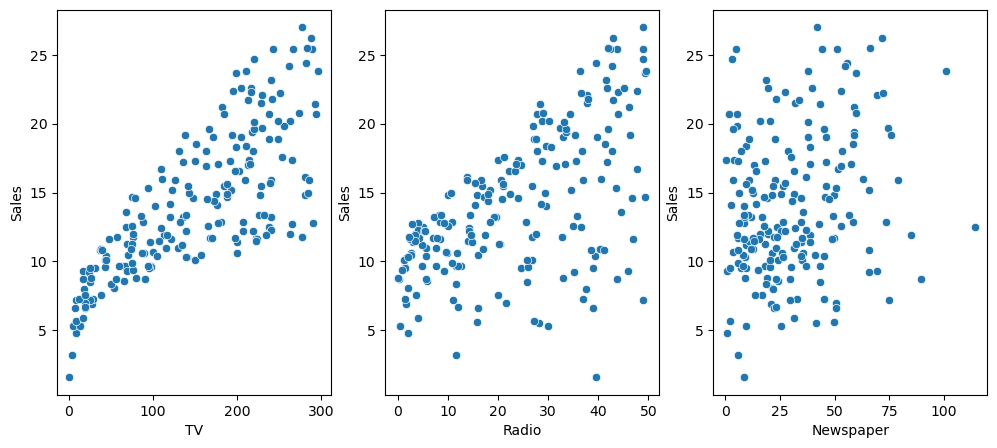

In [10]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
sns.scatterplot(x='TV',y='Sales',data=df)

plt.subplot(1,3,2)
sns.scatterplot(x='Radio', y='Sales',data=df)

plt.subplot(1,3,3)
sns.scatterplot(x='Newspaper', y='Sales',data=df)

<AxesSubplot:xlabel='Sales'>

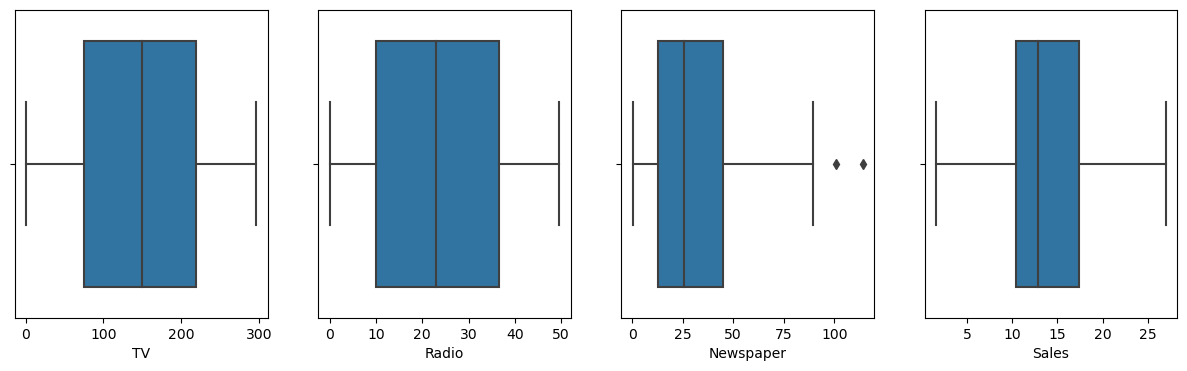

In [11]:
plt.figure(figsize=(15,4))
plt.subplot(1,4,1)
sns.boxplot(x='TV',data=df)

plt.subplot(1,4,2)
sns.boxplot(x='Radio',data=df)

plt.subplot(1,4,3)
sns.boxplot(x='Newspaper',data=df)

plt.subplot(1,4,4)
sns.boxplot(x='Sales',data=df)

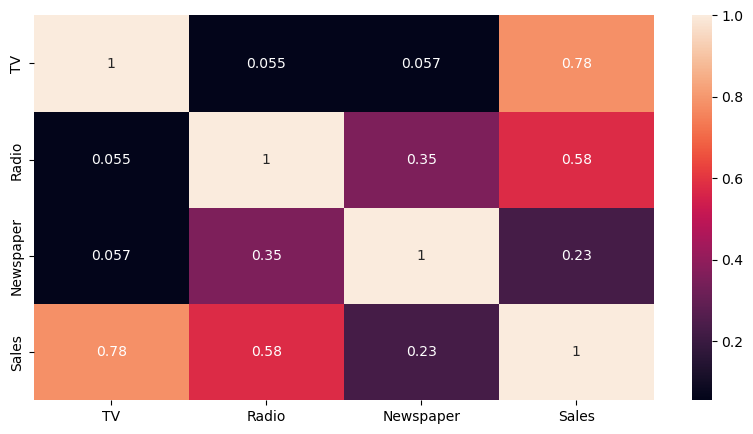

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

#### Splitting Data into Train and Test Data

In [13]:
x=df.drop('Sales',axis=1)

In [14]:
y=df['Sales']

In [15]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [16]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [18]:
print(x.shape, x_train.shape, x_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(200, 3) (160, 3) (40, 3)
(200,) (160,) (40,)


#### Making predictions

In [19]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [20]:
y_pred=model.predict(x_test)

In [21]:
y_pred

array([21.73577184, 16.45693776,  7.65993185, 17.89202679, 18.67730671,
       23.86271904, 16.33623628, 13.45649226,  9.177296  , 17.36056228,
       14.4677995 ,  9.85697601, 17.26057027, 16.71866935, 15.09530285,
       15.58923732, 12.45188167, 17.27925151, 11.0944114 , 18.06889853,
        9.33433055, 12.91345761,  8.7842804 , 10.46670654, 11.40303174,
       15.03104665,  9.78479388, 19.46028647, 18.22954934, 17.1958903 ,
       21.60304218, 14.71901407, 16.29205532, 12.36432281, 19.98831261,
       15.37556411, 13.96678297, 10.06809496, 20.97197274,  7.45877832])

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

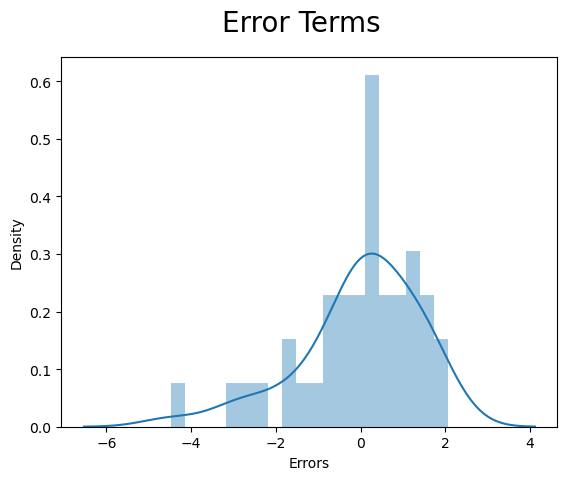

In [26]:
fig=plt.figure()
sns.distplot((y_test-y_pred),bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors')

In [25]:
print('MAE:',mean_absolute_error(y_pred,y_test))
print('RMSE:',np.sqrt(mean_squared_error(y_pred,y_test)))
print('R-Squared',r2_score(y_pred,y_test))

MAE: 1.0402154012924711
RMSE: 1.4113417558581578
R-Squared 0.8832957189120247
